# Simulating Stock Prices using GBM

In [63]:
import pandas as pd
import numpy as np

## (a)

In [64]:

# Load the data
file_path = 'C:/Users/Hiroo/Downloads/Campus/Year 4/Semester 1/ST 4031 - Stochastic Processes and Applications/Simulating Stock Price/HASU Historical Data(2).csv'
data = pd.read_csv(file_path)

# Check for missing values in the dataset
missing_values = data.isna().sum()

# Display the missing values
print(missing_values)

Date            0
Price           0
Unnamed: 2    498
Unnamed: 3    498
Unnamed: 4    498
Unnamed: 5    498
Unnamed: 6    498
dtype: int64


In [65]:
# Clean the data by selecting relevant columns and removing any rows with NaN values
data = data[['Date', 'Price']].dropna()

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values(by='Date')

# Create the time index
data['Time Index'] = range(len(data))

# Display the cleaned data with the time index
print(data.head())

        Date  Price  Time Index
0 2022-06-20   32.2           0
1 2022-06-21   33.0           1
2 2022-06-22   33.0           2
3 2022-06-23   33.0           3
4 2022-06-24   35.0           4


## (b) In the report

## (c)

In [66]:
# Calculate log returns
data['Log_Return'] = np.log(data['Price'] / data['Price'].shift(1))

# Display the log returns
print(data[['Date', 'Log_Return']].head())

        Date  Log_Return
0 2022-06-20         NaN
1 2022-06-21    0.024541
2 2022-06-22    0.000000
3 2022-06-23    0.000000
4 2022-06-24    0.058841


In [67]:
# Remove rows with NaN values in the 'Log_Return' column
data = data.dropna(subset=['Log_Return'])

# Reset the index and drop the old index column
data.reset_index(drop=True, inplace=True)

# Display the cleaned data with the new index
print(data.head())

        Date  Price  Time Index  Log_Return
0 2022-06-21   33.0           1    0.024541
1 2022-06-22   33.0           2    0.000000
2 2022-06-23   33.0           3    0.000000
3 2022-06-24   35.0           4    0.058841
4 2022-06-27   35.1           5    0.002853


In [48]:
# Calculate drift parameter (mean of log returns)
mean_log_return = data['Log_Return'].mean()

# Calculate scale parameter (standard deviation of log returns)
var_log_return = data['Log_Return'].var()

print(f"Mean of logreturns: {mean_log_return}")
print(f"Variance of logreturns: {var_log_return}")

Mean of logreturns: 0.0011909837066137467
Variance of logreturns: 0.0005467189389938387


In [49]:
# Estimate drift parameter (μ_GB)
mu_GB = mean_log_return + 0.5 * var_log_return

# Estimate scale parameter (σ)
sigma = np.sqrt(var_log_return)

print(f"Drift Parameter (μ_GB): {mu_GB}")
print(f"Scale Parameter (σ): {sigma}")

Drift Parameter (μ_GB): 0.001464343176110666
Scale Parameter (σ): 0.023382021704588307


## (d) Normality of Log Returns

### The Shapiro-Wilk test

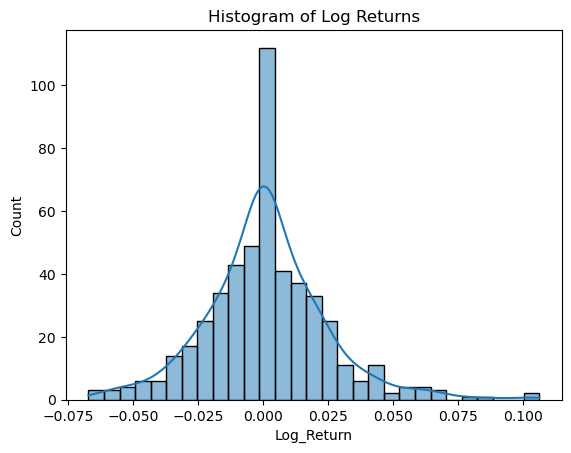

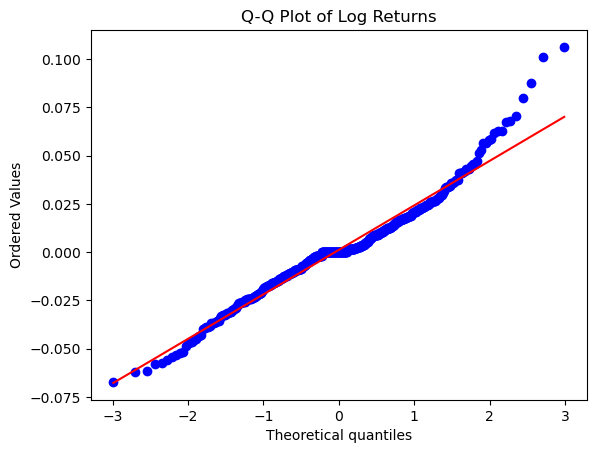

Shapiro-Wilk Statistic: 0.963689923286438
p-value: 9.790684929456006e-10


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Plot histogram and Q-Q plot
sns.histplot(data['Log_Return'], kde=True)
plt.title('Histogram of Log Returns')
plt.show()

# Q-Q plot
from scipy.stats import probplot
probplot(data['Log_Return'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Log Returns')
plt.show()

# Perform Shapiro-Wilk test
stat, p = shapiro(data['Log_Return'].dropna())
print(f"Shapiro-Wilk Statistic: {stat}")
print(f"p-value: {p}")

Since the p-value is much smaller than the common significance level (e.g., 0.05), you reject the null hypothesis. This suggests that the log returns do not follow a normal distribution.

### the Kolmogorov-Smirnov test

In [46]:
from scipy.stats import kstest, norm

# Remove rows with NaN values in the 'Log_Return' column
data = data.dropna(subset=['Log_Return'])

# Perform Kolmogorov-Smirnov test for normality
statistic, p_value = kstest(data['Log_Return'], 'norm', args=(data['Log_Return'].mean(), data['Log_Return'].std()))

print(f"K-S Statistic: {statistic}")
print(f"p-value: {p_value}")

K-S Statistic: 0.08824364103567706
p-value: 0.0008120036388803193


Since the p-value is much smaller than the common significance level of 0.05, you reject the null hypothesis. This suggests that the log returns do not follow a normal distribution.

## (e)

In [55]:
import matplotlib.pyplot as plt

# Parameters
mu_GB = 0.001464343176110666  
sigma = 0.023382021704588307  
S0 = data['Price'].iloc[-1]  # Initial price from the last known closing price
num_simulations = 5000
num_days = 20
delta_t = 1  # Daily steps

# Initialize array to hold simulated paths
paths = np.zeros((num_simulations, num_days + 1))

# Set initial prices
paths[:, 0] = S0

# Simulate paths
for i in range(num_simulations):
    for t in range(1, num_days + 1):
        Z = np.random.normal(0, 1)  # Standard normal random variable
        paths[i, t] = paths[i, t - 1] * np.exp(
            (mu_GB - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * Z
        )

# Convert to DataFrame for easy handling
dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=num_days + 1)
paths_df = pd.DataFrame(paths, columns=dates)


## (f)

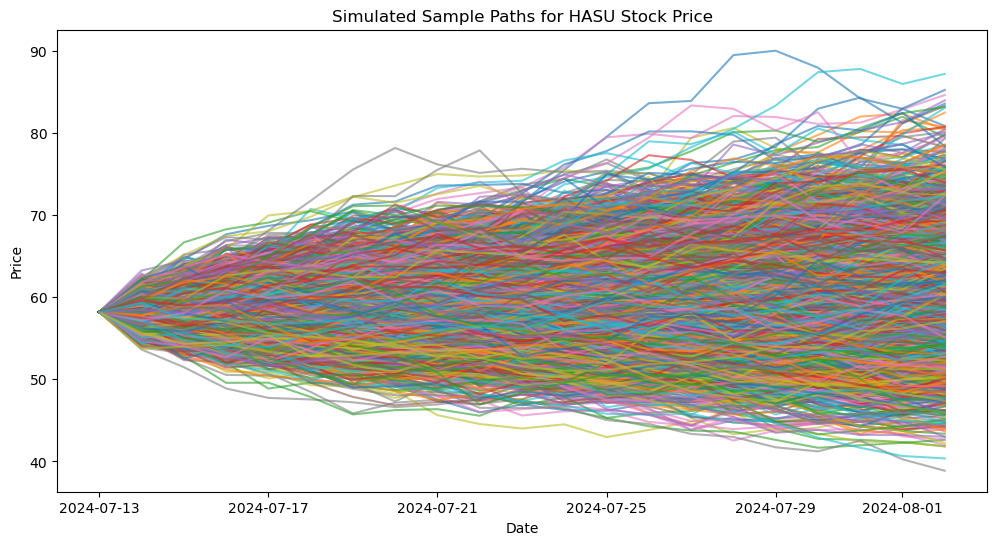

In [56]:
# Plot sample paths
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(dates, paths[i], alpha=0.6)
plt.title('Simulated Sample Paths for HASU Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## (g)

Statistics for Simulated Closing Prices on the Last Day:
Mean Price: 59.87
Median Price: 59.43
25th Percentile: 55.47
75th Percentile: 63.87
Minimum Price: 38.87
Maximum Price: 87.23


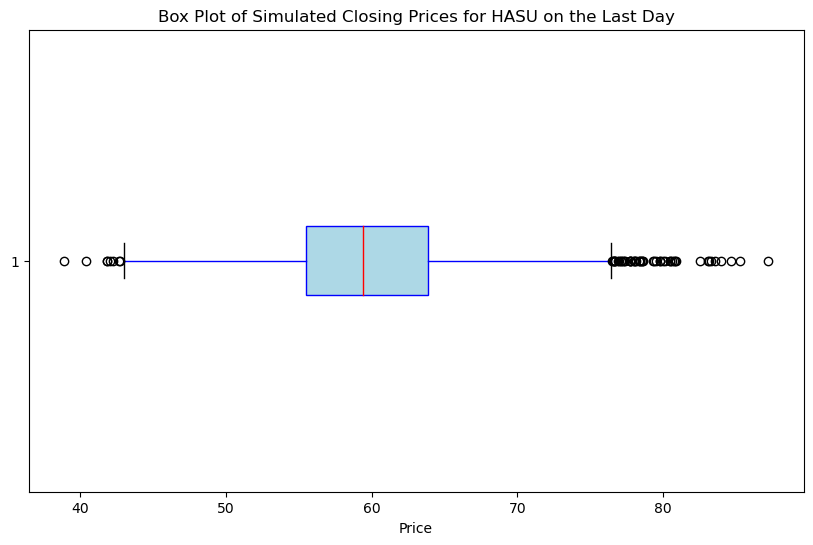

In [59]:
# Extract the prices for the last day
last_day_prices = paths[:, -1]

# Calculate statistics
mean_price = np.mean(last_day_prices)
median_price = np.median(last_day_prices)
q25 = np.percentile(last_day_prices, 25)
q75 = np.percentile(last_day_prices, 75)
min_price = np.min(last_day_prices)
max_price = np.max(last_day_prices)

# Print statistics
print(f"Statistics for Simulated Closing Prices on the Last Day:")
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"25th Percentile: {q25:.2f}")
print(f"75th Percentile: {q75:.2f}")
print(f"Minimum Price: {min_price:.2f}")
print(f"Maximum Price: {max_price:.2f}")

# Create a DataFrame for the last day prices
prices_df = pd.DataFrame(last_day_prices, columns=['Price'])

# Plot a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(prices_df['Price'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Simulated Closing Prices for HASU on the Last Day')
plt.xlabel('Price')
plt.show()

## (h)

In [60]:
# Define the range
lower_bound = 55
upper_bound = 60

# Calculate the probability
probability = np.mean((last_day_prices >= lower_bound) & (last_day_prices <= upper_bound))

print(f"The probability that the closing price on the last day is between {lower_bound} and {upper_bound} is {probability:.4f}")

The probability that the closing price on the last day is between 55 and 60 is 0.3114


## (i)

In [61]:
# Calculate the 95% prediction interval
lower_bound = np.percentile(last_day_prices, 2.5)
upper_bound = np.percentile(last_day_prices, 97.5)

print(f"The 95% prediction interval for the closing price on the last day is between {lower_bound:.2f} and {upper_bound:.2f}.")

The 95% prediction interval for the closing price on the last day is between 48.67 and 73.13.
